# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [2]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import environmentv2 as e
import seaborn as sns
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

1/3 -- 0.33475494384765625
0.35 -- 0.36702728271484375
0.4 -- 0.47370147705078125
0.45 -- 0.6032638549804688

In [3]:
alpha = 0.45
gamma = 0.5
env = e.Environment(alpha, gamma, T=9)

In [4]:
from dqn_agent import Agent
agent = Agent(state_size=3, action_size=4, seed=0)

In [5]:
rho = 0.6032638549804688
def evalReward(reward):
    reward = (1 - rho) * reward[0] - rho * reward[1]
    return reward

### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Alternatively, you can skip to the next step below (**4. Watch a Smart Agent!**), to load the saved model weights from a pre-trained agent.

In [6]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.1, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    first_override = []
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(np.asarray(state), eps)
            next_state, reward = env.takeAction(action)
            reward_val = evalReward(reward)
            agent.step(state, action, reward_val, next_state)
            state = next_state
            score += reward_val
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps*eps_decay) # decrease epsilon
        print('\rEpisode {}\t  Score: {:.2f}'.format(i_episode, np.mean(score)))
        print(eps)
        # plot 
        policy = agent.extractPolicy()
        agent.printPolicy(policy)
#         if policy[(1,0)] == 2:
#             first_override.append(i_episode)
#         f, ax = plt.subplots(figsize=(3,3))
#         ax.imshow(policy)
#         ax = sns.heatmap(policy, annot=True)
#         cb = ax.collections[-1].colorbar   
#         cb.remove()
#         plt.xticks([])
#         plt.yticks([])
#         plt.show()
    return scores, first_override

scores, overrides = dqn()

Episode 1	  Score: -2916.82
0.995
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & www & www & www & www & www & www & www & www & www \\ 
3 & www & www & www & www & www & www & www & www & www \\ 
4 & www & www & www & www & www & www & www & www & www \\ 
5 & www & www & www & www & www & www & www & www & www \\ 
6 & www & www & www & www & www & www & www & www & www \\ 
7 & www & www & www & www & www & www & www & www & www \\ 
8 & www & www & www & www & www & www & www & www & www \\ 

Episode 2	  Score: -2776.05
0.990025
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & www & www & www & www & www & www & www & www & www \\ 
3 & www & www & www & www & www & www & www & www & www \\ 
4 & www & www & www & www & www & www & www & www & www \\ 
5 & www & www & www & www & www & www & www & www & www \\ 
6 & www & www & www & www & 

Episode 15	  Score: -2626.92
0.9275689688183278
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & ooo & www & www & www & www & www & www & www & www \\ 
3 & ooo & ooo & www & www & www & www & www & www & www \\ 
4 & ooo & ooo & www & www & www & www & www & www & www \\ 
5 & ooo & ooo & ooo & www & www & www & www & www & www \\ 
6 & ooo & ooo & ooo & ooo & www & www & www & www & www \\ 
7 & ooo & ooo & ooo & ooo & www & www & www & www & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & www & www & www & www \\ 

Episode 16	  Score: -2551.93
0.9229311239742362
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & ooo & www & www & www & www & www & www & www & www \\ 
3 & ooo & woo & www & www & www & www & www & www & www \\ 
4 & ooo & ooo & www & www & www & www & www & www & www \\ 
5 & ooo & ooo & ooo & www & www & www & www & www & www \\ 
6 &

Episode 29	  Score: -2495.17
0.8647077305675338
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & ooo & www & www & www & www & www & www & www & www \\ 
3 & ooo & woo & www & www & www & www & www & www & www \\ 
4 & ooo & ooo & www & www & www & www & www & www & www \\ 
5 & ooo & ooo & ooo & www & www & www & www & www & www \\ 
6 & ooo & ooo & ooo & ooo & www & www & www & www & www \\ 
7 & ooo & ooo & ooo & ooo & www & www & www & www & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & www & www & www & www \\ 

Episode 30	  Score: -2414.52
0.8603841919146962
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & ooo & www & www & www & www & www & www & www & www \\ 
3 & ooo & woo & www & www & www & www & www & www & www \\ 
4 & ooo & ooo & www & www & www & www & www & www & www \\ 
5 & ooo & ooo & ooo & www & www & www & www & www & www \\ 
6 &

Episode 43	  Score: -2289.20
0.8061065909263957
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & woo & www & www & www & www & www & www & www & www \\ 
3 & ooo & woo & www & www & www & www & www & www & www \\ 
4 & ooo & ooo & wow & www & www & www & www & www & www \\ 
5 & ooo & ooo & woo & www & www & www & www & www & www \\ 
6 & ooo & ooo & ooo & woo & www & www & www & www & www \\ 
7 & ooo & ooo & ooo & ooo & woo & www & www & www & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & woo & www & www & www \\ 

Episode 44	  Score: -2263.72
0.8020760579717637
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & woo & www & www & www & www & www & www & www & www \\ 
3 & ooo & woo & www & www & www & www & www & www & www \\ 
4 & ooo & woo & wow & www & www & www & www & www & www \\ 
5 & ooo & ooo & woo & www & www & www & www & www & www \\ 
6 &

Episode 57	  Score: -2026.93
0.7514768435208588
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & woo & www & www & www & www & www & www & www & www \\ 
3 & woo & woo & www & www & www & www & www & www & www \\ 
4 & woo & woo & wow & www & www & www & www & www & www \\ 
5 & woo & woo & woo & www & www & www & www & www & www \\ 
6 & ooo & woo & woo & woo & www & www & www & www & www \\ 
7 & ooo & woo & woo & woo & woo & www & www & www & www \\ 
8 & ooo & ooo & woo & woo & ooo & woo & www & www & www \\ 

Episode 58	  Score: -2130.80
0.7477194593032545
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & woo & www & www & www & www & www & www & www & www \\ 
3 & woo & woo & www & www & www & www & www & www & www \\ 
4 & woo & woo & woo & www & www & www & www & www & www \\ 
5 & woo & woo & woo & www & www & www & www & www & www \\ 
6 &

Episode 71	  Score: -2146.07
0.7005493475733617
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & woo & www & www & www & www & www & www & www & www \\ 
3 & woo & www & www & www & www & www & www & www & www \\ 
4 & woo & woo & www & www & www & www & www & www & www \\ 
5 & woo & woo & wwo & www & www & www & www & www & www \\ 
6 & woo & woo & wwo & www & www & www & www & www & www \\ 
7 & woo & woo & wwo & wwo & www & www & www & www & www \\ 
8 & woo & woo & wwo & wwo & www & www & www & www & www \\ 

Episode 72	  Score: -2053.41
0.697046600835495
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & woo & www & www & www & www & www & www & www & www \\ 
3 & woo & wow & www & www & www & www & www & www & www \\ 
4 & woo & woo & www & www & www & www & www & www & www \\ 
5 & woo & woo & woo & www & www & www & www & www & www \\ 
6 & 

Episode 85	  Score: -1926.50
0.653073201944699
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & woo & www & www & www & www & www & www & www & www \\ 
3 & woo & www & www & www & www & www & www & www & www \\ 
4 & woo & wwo & www & www & www & www & www & www & www \\ 
5 & woo & wwo & wwo & www & www & www & www & www & www \\ 
6 & woo & wwo & wwo & www & www & www & www & www & www \\ 
7 & woo & woo & wwo & wwo & www & www & www & www & www \\ 
8 & woo & wwo & wwo & wwo & www & www & www & www & www \\ 

Episode 86	  Score: -1900.11
0.6498078359349755
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & woo & www & www & www & www & www & www & www & www \\ 
3 & woo & www & www & www & www & www & www & www & www \\ 
4 & woo & woo & www & www & www & www & www & www & www \\ 
5 & woo & woo & wwo & www & www & www & www & www & www \\ 
6 & 

Episode 99	  Score: -2017.65
0.6088145090359074
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & woo & www & wwm & www & www & www & www & www & www \\ 
3 & woo & wow & www & wwm & www & www & www & www & www \\ 
4 & woo & woo & www & www & www & www & www & www & www \\ 
5 & woo & woo & woo & www & www & www & www & www & www \\ 
6 & woo & woo & woo & woo & oww & www & www & www & www \\ 
7 & woo & woo & woo & woo & ooo & oww & www & www & www \\ 
8 & woo & woo & woo & woo & ooo & ooo & www & www & www \\ 

Episode 100	  Score: -1798.83
0.6057704364907278
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & woo & www & wwm & www & www & www & www & www & www \\ 
3 & woo & woo & www & wwm & www & www & www & www & www \\ 
4 & woo & woo & woo & www & www & www & www & www & www \\ 
5 & woo & woo & woo & oww & www & www & www & www & www \\ 
6 

Episode 113	  Score: -1670.14
0.567555222460375
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & wmw & www & www & www & www & www & www & www \\ 
2 & woo & www & wwm & www & www & www & www & www & www \\ 
3 & woo & woo & www & wwm & www & www & www & www & www \\ 
4 & ooo & woo & ooo & www & wwm & www & www & www & www \\ 
5 & ooo & ooo & ooo & ooo & wwm & wwm & www & www & www \\ 
6 & ooo & ooo & ooo & ooo & ooo & wwm & wwm & www & www \\ 
7 & ooo & ooo & ooo & ooo & ooo & ooo & wwm & wwm & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & oom & wmm & wwm \\ 

Episode 114	  Score: -1684.78
0.5647174463480732
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & woo & www & wwm & www & www & www & www & www & www \\ 
3 & woo & woo & www & wwm & www & www & www & www & www \\ 
4 & woo & woo & ooo & www & www & www & www & www & www \\ 
5 & ooo & woo & ooo & ooo & www & www & www & www & www \\ 
6 

Episode 127	  Score: -1526.60
0.5290920728090721
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & wmw & www & www & www & www & www & www & www \\ 
2 & woo & www & wmm & www & www & www & www & www & www \\ 
3 & woo & woo & www & wwm & www & www & www & www & www \\ 
4 & woo & woo & woo & www & wwm & www & www & www & www \\ 
5 & woo & woo & woo & ooo & www & wwm & www & www & www \\ 
6 & woo & woo & woo & ooo & ooo & wwm & wwm & www & www \\ 
7 & ooo & woo & ooo & ooo & ooo & ooo & wwm & wwm & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmm & wwm \\ 

Episode 128	  Score: -1404.72
0.5264466124450268
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & www & www & www & www & www & www & www & www \\ 
2 & woo & www & www & www & www & www & www & www & www \\ 
3 & woo & woo & www & wwm & www & www & www & www & www \\ 
4 & ooo & woo & ooo & www & wwm & www & www & www & www \\ 
5 & ooo & ooo & ooo & ooo & www & wwm & www & www & www \\ 
6

Episode 141	  Score: -1315.65
0.4932355662165453
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & wmw & www & www & www & www & www & www & www \\ 
2 & woo & www & wmw & www & www & www & www & www & www \\ 
3 & woo & woo & www & wwm & www & www & www & www & www \\ 
4 & woo & woo & ooo & www & wmm & www & www & www & www \\ 
5 & woo & woo & ooo & ooo & www & wmm & www & www & www \\ 
6 & woo & woo & ooo & ooo & ooo & www & wmm & www & www \\ 
7 & woo & ooo & ooo & ooo & ooo & ooo & wwm & wwm & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wwm & wwm \\ 

Episode 142	  Score: -1408.41
0.4907693883854626
0 & www & www & www & www & www & www & www & www & www \\ 
1 & www & wmw & www & www & www & www & www & www & www \\ 
2 & woo & www & wmw & www & www & www & www & www & www \\ 
3 & woo & woo & owo & wwm & www & www & www & www & www \\ 
4 & woo & woo & ooo & www & wmm & www & www & www & www \\ 
5 & ooo & ooo & ooo & ooo & www & wmm & www & www & www \\ 
6

Episode 155	  Score: -1267.57
0.4598090507939749
0 & www & www & wwa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & wmw & www & www & www & www & www & www & www \\ 
2 & woo & www & www & www & www & www & www & www & www \\ 
3 & woo & woo & ooo & www & www & www & www & www & www \\ 
4 & woo & woo & ooo & ooo & www & www & www & www & www \\ 
5 & woo & woo & ooo & ooo & ooo & www & www & www & www \\ 
6 & woo & woo & ooo & ooo & ooo & ooo & www & www & www \\ 
7 & woo & woo & ooo & ooo & ooo & ooo & ooo & www & www \\ 
8 & woo & ooo & ooo & ooo & ooo & ooo & ooo & woo & wwm \\ 

Episode 156	  Score: -1239.07
0.457510005540005
0 & www & www & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & wmw & www & www & www & www & www & www & www \\ 
2 & woo & oww & wmw & www & www & www & www & www & www \\ 
3 & woo & ooo & ooo & www & www & www & www & www & www \\ 
4 & woo & ooo & ooo & ooo & www & www & www & www & www \\ 
5 & ooo & ooo & ooo & ooo & ooo & www & www & www & www \\ 
6 

Episode 169	  Score: -1025.92
0.4286478463299511
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & wmw & www & www & www & www & www & wwa & aaa \\ 
2 & woo & www & wmw & www & www & www & www & www & www \\ 
3 & woo & ooo & ooo & www & www & www & www & www & www \\ 
4 & woo & woo & ooo & ooo & wmw & www & www & www & www \\ 
5 & woo & woo & ooo & ooo & ooo & wmw & www & www & www \\ 
6 & ooo & ooo & ooo & ooo & ooo & ooo & wmw & www & www \\ 
7 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wwm \\ 

Episode 170	  Score: -1115.91
0.42650460709830135
0 & www & www & aaa & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & www & wmw & www & www & www & www & www & www & www \\ 
2 & woo & oww & wmw & www & www & www & www & www & www \\ 
3 & woo & ooo & ooo & wmw & www & www & www & www & www \\ 
4 & woo & ooo & ooo & ooo & wmw & www & www & www & www \\ 
5 & ooo & ooo & ooo & ooo & ooo & wmw & www & www & www \\ 


Episode 183	  Score: -1114.92
0.3995984329713264
0 & www & aww & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & wmw & www & www & www & www & aaa & aaa & aaa \\ 
2 & woo & www & wmw & www & www & www & www & www & www \\ 
3 & woo & woo & owo & www & www & www & www & www & www \\ 
4 & woo & woo & ooo & ooo & wmw & www & www & www & www \\ 
5 & woo & woo & woo & ooo & ooo & wmw & www & www & www \\ 
6 & woo & woo & woo & ooo & ooo & ooo & wmw & www & www \\ 
7 & woo & woo & woo & ooo & ooo & ooo & ooo & wmw & www \\ 
8 & woo & woo & woo & ooo & ooo & ooo & ooo & ooo & www \\ 

Episode 184	  Score: -1071.32
0.3976004408064698
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & www & www & www & www & www & aaa & aaa & aaa \\ 
2 & woo & oww & wmw & www & www & www & www & www & www \\ 
3 & woo & woo & ooo & www & www & www & www & www & www \\ 
4 & woo & woo & ooo & ooo & www & www & www & www & www \\ 
5 & woo & woo & ooo & ooo & ooo & www & www & www & www \\ 
6

Episode 197	  Score: -1056.73
0.37251769488706843
0 & www & aww & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & www & www & www & www & aaa & aaa & aaa & aaa \\ 
2 & woo & oww & www & www & www & www & www & www & aww \\ 
3 & woo & woo & ooo & www & www & www & www & www & www \\ 
4 & woo & woo & ooo & ooo & www & www & www & www & www \\ 
5 & woo & woo & ooo & ooo & ooo & www & www & www & www \\ 
6 & woo & woo & woo & ooo & ooo & ooo & www & www & www \\ 
7 & woo & woo & woo & ooo & ooo & ooo & ooo & www & www \\ 
8 & woo & woo & woo & ooo & ooo & ooo & ooo & ooo & www \\ 

Episode 198	  Score: -1052.46
0.3706551064126331
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & www & www & www & www & aaa & aaa & aaa & aaa \\ 
2 & woo & owo & www & www & www & www & www & www & aww \\ 
3 & woo & woo & ooo & www & www & www & www & www & www \\ 
4 & woo & woo & ooo & ooo & www & www & www & www & www \\ 
5 & woo & woo & ooo & ooo & ooo & www & www & www & www \\ 


Episode 211	  Score: -947.78
0.3472722151889232
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & www & www & www & aww & aaa & aaa & aaa & aaa \\ 
2 & woo & owo & www & www & www & www & www & www & aaa \\ 
3 & woo & woo & owo & www & www & www & www & www & www \\ 
4 & woo & woo & omo & ooo & www & www & www & www & www \\ 
5 & woo & woo & omo & ooo & ooo & www & www & www & www \\ 
6 & woo & woo & woo & ooo & ooo & ooo & www & www & www \\ 
7 & woo & woo & woo & ooo & ooo & ooo & ooo & www & www \\ 
8 & woo & woo & ooo & ooo & ooo & ooo & ooo & ooo & www \\ 

Episode 212	  Score: -1017.89
0.3455358541129786
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & wmw & www & www & aww & aaa & aaa & aaa & aaa \\ 
2 & woo & owo & wmw & www & www & www & www & aaa & aaa \\ 
3 & woo & ooo & ooo & www & www & www & www & www & www \\ 
4 & woo & wmo & omo & ooo & wmw & www & www & www & www \\ 
5 & woo & woo & omo & omo & ooo & wmw & www & www & www \\ 
6 

Episode 225	  Score: -859.90
0.3237376186352221
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & www & www & www & aww & aaa & aaa & aaa & aaa \\ 
2 & woo & ooo & wmw & www & www & www & www & aww & aaa \\ 
3 & woo & woo & ooo & www & www & www & www & www & www \\ 
4 & woo & wmo & omo & ooo & www & www & www & www & www \\ 
5 & woo & wmo & omo & omo & ooo & www & www & www & www \\ 
6 & woo & woo & wmo & omo & ooo & ooo & www & www & www \\ 
7 & woo & woo & woo & ooo & ooo & ooo & ooo & www & www \\ 
8 & woo & woo & ooo & ooo & ooo & ooo & ooo & ooo & www \\ 

Episode 226	  Score: -816.51
0.322118930542046
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & www & www & www & aww & aaa & aaa & aaa & aaa \\ 
2 & woo & oww & www & www & www & www & www & aaa & aaa \\ 
3 & woo & woo & ooo & www & www & www & www & www & www \\ 
4 & woo & wmo & omo & ooo & www & www & www & www & www \\ 
5 & woo & wmo & omo & ooo & ooo & www & www & www & www \\ 
6 & 

Episode 239	  Score: -792.83
0.3017979588795719
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & www & www & www & aaa & aaa & aaa & aaa & aaa \\ 
2 & woo & www & www & www & www & www & aaa & aaa & aaa \\ 
3 & wwo & woo & ooo & www & www & www & www & www & aww \\ 
4 & www & wmo & omo & ooo & www & www & www & www & www \\ 
5 & www & wmw & wmo & ooo & ooo & www & www & www & www \\ 
6 & www & wow & wmo & omo & ooo & ooo & www & www & www \\ 
7 & www & wow & wow & woo & ooo & ooo & ooo & www & www \\ 
8 & www & wow & woo & woo & ooo & ooo & ooo & ooo & www \\ 

Episode 240	  Score: -732.23
0.30028896908517405
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & wmw & www & www & aaa & aaa & aaa & aaa & aaa \\ 
2 & woo & ooo & wmw & www & www & www & aww & aaa & aaa \\ 
3 & woo & woo & ooo & www & www & www & www & www & www \\ 
4 & woo & wmo & omo & ooo & www & www & www & www & www \\ 
5 & woo & wmo & omo & ooo & ooo & www & www & www & www \\ 
6 

Episode 253	  Score: -781.83
0.28134514724562876
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & www & www & www & aaa & aaa & aaa & aaa & aaa \\ 
2 & woo & wwo & www & www & www & www & aaa & aaa & aaa \\ 
3 & wwo & wmo & ooo & www & www & www & www & www & aaa \\ 
4 & www & wmo & omo & ooo & www & www & www & www & www \\ 
5 & www & wmw & wmo & omo & ooo & www & www & www & www \\ 
6 & www & wow & wmo & omo & ooo & ooo & www & www & www \\ 
7 & www & wow & wow & omo & ooo & ooo & ooo & www & www \\ 
8 & www & wow & woo & ooo & ooo & ooo & ooo & ooo & www \\ 

Episode 254	  Score: -767.15
0.2799384215094006
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & www & www & www & aaa & aaa & aaa & aaa & aaa \\ 
2 & woo & ooo & www & www & www & www & aaa & aaa & aaa \\ 
3 & wwo & woo & ooo & www & www & www & www & www & aaa \\ 
4 & www & wmo & omo & ooo & www & www & www & www & www \\ 
5 & www & wmw & omo & ooo & ooo & www & www & www & www \\ 
6 

Episode 267	  Score: -707.33
0.26227842021373715
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & www & www & www & aaa & aaa & aaa & aaa & aaa \\ 
2 & woo & woo & www & www & www & www & aaa & aaa & aaa \\ 
3 & wwo & woo & ooo & www & www & www & www & www & aaa \\ 
4 & woo & woo & ooo & ooo & www & www & www & www & www \\ 
5 & woo & woo & ooo & ooo & ooo & www & www & www & www \\ 
6 & woo & woo & omo & ooo & ooo & ooo & www & www & www \\ 
7 & woo & woo & ooo & ooo & ooo & ooo & ooo & www & www \\ 
8 & woo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & www \\ 

Episode 268	  Score: -724.53
0.2609670281126685
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & www & www & www & aaa & aaa & aaa & aaa & aaa \\ 
2 & woo & ooo & www & www & www & www & aaa & aaa & aaa \\ 
3 & woo & woo & ooo & www & www & www & www & www & aaa \\ 
4 & woo & wmo & omo & ooo & www & www & www & www & www \\ 
5 & woo & wmo & omo & ooo & ooo & www & www & www & www \\ 
6 

Episode 281	  Score: -569.26
0.24450384299593592
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & www & www & www & aaa & aaa & aaa & aaa & aaa \\ 
2 & woo & wwo & www & www & www & aww & aaa & aaa & aaa \\ 
3 & wwo & wmo & ooo & www & www & www & www & aww & aaa \\ 
4 & www & wmo & omo & ooo & www & www & www & www & www \\ 
5 & wow & wmw & omo & omo & ooo & www & www & www & www \\ 
6 & woo & wow & omo & omo & ooo & ooo & www & www & www \\ 
7 & ooo & oow & omo & ooo & ooo & ooo & ooo & www & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & www \\ 

Episode 282	  Score: -675.43
0.24328132378095624
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & www & www & www & aaa & aaa & aaa & aaa & aaa \\ 
2 & wwo & wwo & www & www & www & www & aaa & aaa & aaa \\ 
3 & wwo & wmw & ooo & www & www & www & www & www & aaa \\ 
4 & www & wmw & omo & ooo & www & www & www & www & www \\ 
5 & www & wmw & wmo & omo & ooo & www & www & www & www \\ 
6

Episode 295	  Score: -624.17
0.22793384675362674
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & www & www & www & aaa & aaa & aaa & aaa & aaa \\ 
2 & woo & woo & wmw & www & www & aww & aaa & aaa & aaa \\ 
3 & wwo & wmo & ooo & www & www & www & www & aww & aaa \\ 
4 & www & wmo & omo & ooo & wmw & www & www & www & www \\ 
5 & wow & wmw & omo & omo & ooo & wmw & www & www & www \\ 
6 & woo & wow & omo & ooo & ooo & ooo & wmw & www & www \\ 
7 & ooo & ooo & omo & ooo & ooo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 296	  Score: -563.40
0.22679417751985861
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & www & www & www & aaa & aaa & aaa & aaa & aaa \\ 
2 & wwo & www & www & www & www & aww & aaa & aaa & aaa \\ 
3 & wwo & www & ooo & www & www & www & www & www & aaa \\ 
4 & www & wow & omo & ooo & wmw & www & www & www & www \\ 
5 & www & wmw & wmo & omo & ooo & wmw & www & www & www \\ 
6

Episode 309	  Score: -587.69
0.21248679717794605
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & www & www & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wwo & wwo & www & www & www & aaa & aaa & aaa & aaa \\ 
3 & wwo & wmo & omo & www & www & www & www & aaa & aaa \\ 
4 & www & wmo & omo & ooo & wmw & www & www & www & www \\ 
5 & www & wmw & omo & omo & ooo & wmw & www & www & www \\ 
6 & wow & wmw & wmo & omo & ooo & ooo & wmw & www & www \\ 
7 & wow & wow & omw & omo & ooo & ooo & ooo & wmw & www \\ 
8 & woo & oow & ooo & omo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 310	  Score: -501.19
0.21142436319205632
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & www & www & www & aww & aaa & aaa & aaa & aaa & aaa \\ 
2 & woo & ooo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & woo & ooo & ooo & wmw & www & www & www & aaa & aaa \\ 
4 & woo & ooo & omo & ooo & wmw & www & www & www & www \\ 
5 & ooo & ooo & ooo & ooo & ooo & wmw & www & www & www \\ 
6

Episode 323	  Score: -448.99
0.19808659230739353
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & www & www & aww & aaa & aaa & aaa & aaa & aaa \\ 
2 & woo & owo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & woo & woo & ooo & wmw & www & www & www & aaa & aaa \\ 
4 & wow & woo & omo & ooo & wmw & www & www & www & www \\ 
5 & oow & omw & ooo & ooo & ooo & wmw & www & www & www \\ 
6 & ooo & ooo & omo & ooo & ooo & ooo & wmw & www & www \\ 
7 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 324	  Score: -512.55
0.19709615934585656
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & www & www & www & www & aaa & aaa & aaa & aaa & aaa \\ 
2 & wwo & wwo & www & www & www & aww & aaa & aaa & aaa \\ 
3 & wwo & wmw & ooo & www & www & www & www & aww & aaa \\ 
4 & www & wmw & omo & ooo & wmw & www & www & www & www \\ 
5 & wow & wmw & omo & omo & ooo & wmw & www & www & www \\ 
6

Episode 337	  Score: -526.84
0.1846622876013121
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & www & www & www & www & aaa & aaa & aaa & aaa & aaa \\ 
2 & woo & wwo & wmw & www & www & aww & aaa & aaa & aaa \\ 
3 & wwo & wmw & omo & wmw & www & www & www & aaw & aaa \\ 
4 & wow & wmw & omo & ooo & wmw & www & www & www & www \\ 
5 & wow & wmw & wmo & omo & ooo & wmw & www & www & www \\ 
6 & oow & wmw & wmo & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & oow & omw & omo & ooo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & omo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 338	  Score: -454.93
0.18373897616330553
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & www & www & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & woo & woo & wmw & www & www & aaa & aaa & aaa & aaa \\ 
3 & wwo & wmw & omo & wmw & www & www & aww & aaa & aaa \\ 
4 & wow & wmw & omo & ooo & wmw & www & www & www & aaa \\ 
5 & wow & wmw & omo & omo & ooo & wmw & www & www & www \\ 
6 

Episode 351	  Score: -530.48
0.17214774642209296
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & www & wmw & www & www & aaa & aaa & aaa & aaa & aaa \\ 
2 & wwo & wwo & wmw & www & www & www & aaa & aaa & aaa \\ 
3 & www & wmw & omo & wmw & www & www & www & www & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & www & www \\ 
5 & www & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 & www & wmw & wmw & omo & omo & ooo & wmw & www & www \\ 
7 & www & www & wmw & wmo & omo & ooo & ooo & wmw & www \\ 
8 & www & wow & wow & wmw & ooo & ooo & ooo & ooo & wmw \\ 

Episode 352	  Score: -496.68
0.1712870076899825
0 & www & waw & aaa & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & www & www & www & www & aaa & aaa & aaa & aaa & maa \\ 
2 & woo & woo & wmw & www & www & www & aaa & aaa & aaa \\ 
3 & woo & wmo & ooo & wmw & www & www & www & www & aaa \\ 
4 & wow & wmw & omo & ooo & wmw & www & www & www & www \\ 
5 & wow & wmw & omo & omo & ooo & wmw & www & www & www \\ 
6 

Episode 365	  Score: -436.88
0.16048131420416054
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & www & wmw & www & www & aaa & aaa & aaa & aaa & maa \\ 
2 & wwo & owo & wmw & www & www & aww & aaa & aaa & aaa \\ 
3 & wwo & wmw & ooo & wmw & www & www & www & aaw & aaa \\ 
4 & wow & wmw & omo & ooo & wmw & www & www & www & www \\ 
5 & wow & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 & wow & wmw & wmo & omo & ooo & ooo & wmw & www & www \\ 
7 & woo & woo & wmo & omo & omo & ooo & ooo & wmw & www \\ 
8 & ooo & woo & ooo & omo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 366	  Score: -406.84
0.15967890763313974
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & wmw & www & www & aaa & aaa & aaa & aaa & aaa \\ 
2 & wwo & wwo & wmw & www & www & aww & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & www & aaw & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & www & www \\ 
5 & wow & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6

Episode 379	  Score: -469.80
0.14960551470448571
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & www & wmw & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & woo & ooo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & woo & www & ooo & wmw & www & www & aww & aaa & aaa \\ 
4 & wow & wow & omo & ooo & wmw & www & www & www & aaa \\ 
5 & wow & wmw & woo & omo & ooo & wmw & www & www & www \\ 
6 & ooo & woo & wmo & omo & ooo & ooo & wmw & www & www \\ 
7 & ooo & ooo & omo & ooo & ooo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 380	  Score: -334.21
0.14885748713096328
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & www & wmw & www & aww & aaa & aaa & aaa & aaa & aaa \\ 
2 & woo & wwo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & woo & www & ooo & wmw & www & www & www & aaa & aaa \\ 
4 & wow & wow & wwo & ooo & wmw & www & www & www & aww \\ 
5 & wow & wow & wmo & omo & ooo & wmw & www & www & www \\ 
6

Episode 393	  Score: -441.58
0.13946676683816583
0 & aww & aaw & aaa & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & www & wmw & www & aww & aaa & aaa & aaa & aaa & maa \\ 
2 & wwo & owo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & wow & www & ooo & wmw & www & www & www & aaa & aaa \\ 
4 & wow & wmw & wmo & ooo & wmw & www & www & www & www \\ 
5 & wow & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 & woo & wmw & wmw & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & woo & wmo & omo & ooo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 394	  Score: -337.18
0.138769433003975
0 & aww & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wwo & wwo & wmw & www & www & aaa & aaa & aaa & aaa \\ 
3 & wow & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & wow & wmw & wmo & ooo & wmw & www & www & www & aaa \\ 
5 & wow & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 &

Episode 407	  Score: -331.90
0.13001512070402377
0 & www & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & www & aaw & aaa & aaa & aaa & aaa \\ 
2 & woo & wwo & wmw & www & www & www & aaa & aaa & aaa \\ 
3 & wow & wmw & ooo & wmw & www & www & www & aww & aaa \\ 
4 & wow & wmw & wmo & ooo & wmw & www & www & www & www \\ 
5 & woo & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 & woo & wmo & wmw & wmo & omo & ooo & wmw & www & www \\ 
7 & ooo & woo & wmo & wmo & omo & omo & ooo & wmw & www \\ 
8 & ooo & woo & woo & wmo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 408	  Score: -378.89
0.12936504510050365
0 & www & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & woo & woo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & wow & www & ooo & wmw & www & www & aww & aaa & aaa \\ 
4 & wow & wmw & wmo & ooo & wmw & www & www & www & aaw \\ 
5 & woo & wmw & wmo & omo & ooo & wmw & www & www & www \\ 
6

Episode 421	  Score: -313.87
0.12120401149972035
0 & aww & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & www & aaw & aaa & aaa & aaa & aaa \\ 
2 & www & www & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wow & www & ooo & wmw & www & www & www & aaa & aaa \\ 
4 & wow & wmw & www & ooo & wmw & www & www & www & aaw \\ 
5 & wow & wmw & wmw & owo & ooo & wmw & www & www & www \\ 
6 & woo & wmw & wmw & wmw & omo & ooo & wmw & www & www \\ 
7 & woo & woo & wmw & wmw & owo & ooo & ooo & wmw & www \\ 
8 & woo & woo & woo & wow & oow & ooo & ooo & ooo & wmw \\ 

Episode 422	  Score: -312.52
0.12059799144222175
0 & www & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & www & aaw & aaa & aaa & aaa & aaa \\ 
2 & wwo & wwo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wow & www & ooo & wmw & www & www & www & aaa & aaa \\ 
4 & wow & wmw & wwo & ooo & wmw & www & www & www & aaw \\ 
5 & woo & wmw & wmw & owo & ooo & wmw & www & www & www \\ 
6

Episode 435	  Score: -324.64
0.11299003011401039
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & aww & aaw & aaa & aaa & aaa & aaa \\ 
2 & wwo & ooo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wow & wmw & ooo & wmw & www & www & www & aaa & aaa \\ 
4 & wow & wmw & wmo & ooo & wmw & www & www & www & aaw \\ 
5 & woo & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 & woo & wmo & wmw & omo & ooo & ooo & wmw & www & www \\ 
7 & ooo & woo & wmo & omo & ooo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 436	  Score: -327.77
0.11242507996344034
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmw & www & www & www & aaw & aaa & aaa & aaa & aaa \\ 
2 & wwo & wwo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wow & www & ooo & wmw & www & www & www & aaw & aaa \\ 
4 & wow & wmw & wwo & ooo & wmw & www & www & www & www \\ 
5 & woo & wmw & wmw & owo & ooo & wmw & www & www & www \\ 
6

Episode 449	  Score: -256.86
0.10533270926593409
0 & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & www & wwo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wow & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & wow & wmw & wmo & ooo & wmw & www & www & www & aaa \\ 
5 & wow & wmw & wmw & owo & ooo & wmw & www & www & www \\ 
6 & woo & wmw & wmw & omo & ooo & ooo & wmw & www & www \\ 
7 & ooo & woo & wmo & omo & omo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 450	  Score: -293.45
0.10480604571960442
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & aww & aaw & aaa & aaa & aaa & aaa \\ 
2 & www & www & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wow & www & ooo & www & www & www & aww & aaa & aaa \\ 
4 & wow & wmw & www & ooo & wmw & www & www & www & aaw \\ 
5 & wow & wmw & wmw & owo & ooo & wmw & www & www & www \\ 
6

Episode 463	  Score: -238.83
0.1
0 & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & www & owo & www & www & aww & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & wow & wmw & wmw & owo & ooo & wmw & www & www & www \\ 
6 & wow & wmw & wmw & omo & ooo & ooo & wmw & www & www \\ 
7 & woo & woo & wmo & omo & ooo & ooo & ooo & wmw & www \\ 
8 & ooo & woo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 464	  Score: -267.89
0.1
0 & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmw & www & www & aww & aaw & aaa & aaa & aaa & maa \\ 
2 & www & wwo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & wow & wmw & wwo & ooo & wmw & www & www & www & aaa \\ 
5 & wow & wmw & wmw & owo & ooo & wmw & www & www & www \\ 
6 & woo & wmw & wmw & wmo & omo &

Episode 478	  Score: -313.15
0.1
0 & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & www & www & aaw & aaa & aaa & aaa & aaa & maa \\ 
2 & www & wwo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & aww & aaa \\ 
5 & wow & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 & wow & wmw & wmw & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & woo & wmo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 479	  Score: -243.29
0.1
0 & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & wmw & www & aaw & aaa & aaa & aaa & aaa & maa \\ 
2 & www & wwo & wmw & www & www & aaw & aaa & aaa & maa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & wow & wmw & wmo & ooo & wmw & www & www & aww & aaa \\ 
5 & wow & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 & wow & wmw & wmw & omo & omo &

Episode 493	  Score: -297.44
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & wmw & www & aww & aaw & aaa & aaa & aaa & maa \\ 
2 & wmo & wwo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & www & aaa \\ 
5 & wow & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 & wow & wmw & wmw & wmo & omo & ooo & wmw & www & www \\ 
7 & woo & woo & wmo & wmo & omo & omo & ooo & wmw & www \\ 
8 & woo & woo & woo & woo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 494	  Score: -286.32
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & www & www & aww & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wwo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & www & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & www & aaw \\ 
5 & www & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 & www & wmw & wmw & wmo & omo &

Episode 508	  Score: -237.94
0.1
0 & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & wmw & www & aaw & aaa & aaa & aaa & aaa & maa \\ 
2 & wmo & wmo & wmw & www & aww & aaa & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & omo & ooo & wmw & www & www & aaw \\ 
6 & wow & wmw & wmw & omo & omo & ooo & wmw & www & www \\ 
7 & woo & woo & wmo & omo & omo & omo & ooo & wmw & www \\ 
8 & woo & woo & ooo & omo & omo & ooo & ooo & ooo & wmw \\ 

Episode 509	  Score: -280.55
0.1
0 & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & www & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmo & wwo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & aaw & aaa \\ 
5 & wow & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 & woo & wmw & wmw & omo & omo &

Episode 523	  Score: -350.66
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & maa \\ 
2 & wmo & ooo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & wow & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & wow & wmw & omo & ooo & wmw & www & www & aaw & aaa \\ 
5 & wow & wow & omo & ooo & ooo & wmw & www & www & www \\ 
6 & ooo & ooo & ooo & ooo & ooo & ooo & wmw & www & www \\ 
7 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 524	  Score: -308.40
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & owo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & www & www & www & aaw & aaa \\ 
5 & wow & wmw & wmw & owo & ooo & wmw & www & www & www \\ 
6 & wow & wmw & wmw & omo & ooo &

Episode 538	  Score: -296.20
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & maa \\ 
2 & wmo & omo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & wow & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & wow & wmw & omo & ooo & wmw & www & www & aaw & aaa \\ 
5 & wow & wmw & wmo & omo & ooo & wmw & www & www & www \\ 
6 & ooo & wmo & omw & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & ooo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 539	  Score: -305.01
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & maa \\ 
2 & wmo & ooo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wow & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & wow & wmw & wmo & ooo & wmw & www & www & aaw & aaa \\ 
5 & wow & wmw & wmo & omo & ooo & wmw & www & www & www \\ 
6 & woo & wmo & wmw & omo & omo &

Episode 553	  Score: -253.68
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & www & www & aww & aaw & aaa & aaa & aaa & maa \\ 
2 & wmo & wwo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & wmw & www & www & www & aaa \\ 
5 & www & wmw & wmw & owo & ooo & wmw & www & www & www \\ 
6 & www & wmw & wmw & wmo & omo & ooo & wmw & www & www \\ 
7 & www & wow & wmw & wmo & owo & ooo & ooo & wmw & www \\ 
8 & woo & woo & woo & woo & ooo & owo & ooo & ooo & wmw \\ 

Episode 554	  Score: -304.39
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & wmw & www & aaw & aaa & aaa & aaa & aaa & maa \\ 
2 & wmo & ooo & wmw & www & aww & aaw & aaa & aaa & aaa \\ 
3 & wow & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & wow & wmw & omo & ooo & wmw & www & www & aaw & aaa \\ 
5 & wow & wmw & omo & omo & ooo & wmw & www & www & waw \\ 
6 & ooo & omo & omo & omo & omo &

Episode 568	  Score: -324.07
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & maa \\ 
2 & wmo & owo & www & www & www & aaw & aaa & aaa & maa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & wmw & www & www & www & aaa \\ 
5 & www & wmw & wmw & owo & ooo & wmw & www & www & www \\ 
6 & www & wmw & wmw & wmo & owo & ooo & wmw & www & www \\ 
7 & woo & woo & wmw & omw & owo & omo & ooo & wmw & www \\ 
8 & ooo & woo & ooo & ooo & omo & owo & ooo & ooo & wmw \\ 

Episode 569	  Score: -288.30
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & ooo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wow & wmo & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & wow & wmw & omo & ooo & wmw & www & www & aaw & aaa \\ 
5 & woo & wmw & omo & omo & ooo & wmw & www & www & www \\ 
6 & ooo & wmo & omo & omo & omo &

Episode 583	  Score: -203.22
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & wmw & www & aaw & aaa & aaa & aaa & aaa & maa \\ 
2 & wmo & ooo & wmw & www & aww & aaw & aaa & aaa & maa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & aaw & aaa \\ 
5 & wow & wmw & wmw & omo & ooo & wmw & www & www & aaw \\ 
6 & oow & wmw & wmw & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & ooo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & omo & ooo & ooo & wmw \\ 

Episode 584	  Score: -313.52
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & wmw & www & aaw & aaa & aaa & aaa & aaa & maa \\ 
2 & wmo & ooo & wmw & www & www & aaw & aaa & aaa & maa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & wow & wmw & omo & ooo & wmw & www & www & aaw & aaa \\ 
5 & wow & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 & oow & omw & omw & omo & omo &

Episode 598	  Score: -315.71
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & www & www & aww & aaw & aaa & aaa & aaa & maa \\ 
2 & wmo & owo & www & www & www & aaw & aaa & aaa & maa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & www & aaw \\ 
5 & www & wmw & wmw & owo & ooo & wmw & www & www & www \\ 
6 & wow & wow & wmw & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & ooo & omo & omo & owo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & owo & omo & ooo & wmw \\ 

Episode 599	  Score: -299.91
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & wmw & www & aaw & aaa & aaa & aaa & aaa & maa \\ 
2 & wmo & ooo & www & www & aww & aaw & aaa & aaa & maa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & omo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmo & ooo & ooo & wmw & www & www & www \\ 
6 & wow & wmw & wow & omo & ooo &

Episode 613	  Score: -198.24
0.1
0 & waw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & wmw & www & www & aaw & aaa & aaa & aaa & maa \\ 
2 & wmo & omo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & www & aaw \\ 
5 & www & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 & wow & wmw & wmw & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & ooo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 614	  Score: -258.08
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & maa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & maa \\ 
2 & wmw & owo & www & www & www & aaw & aaa & aaa & maa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 & wow & wmw & wow & omo & omo &

Episode 628	  Score: -370.86
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmo & owo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & wow & wmw & wmo & ooo & wmw & www & www & aaw & aaa \\ 
5 & wow & wmw & wmw & omo & ooo & wmw & www & www & waw \\ 
6 & oow & omw & omw & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & ooo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 629	  Score: -321.33
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & owo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & owo & ooo & wmw & www & www & www \\ 
6 & wow & wmw & wow & omo & omo &

Episode 643	  Score: -281.75
0.1
0 & waw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & waw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & omo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & omo & ooo & wmw & www & www & waw & aaa \\ 
5 & wow & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 & wow & wmw & omw & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & ooo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 644	  Score: -355.77
0.1
0 & waw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & www & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wwo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & waw & aaa \\ 
5 & www & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 & wow & wmw & wmw & omo & omo &

Episode 658	  Score: -259.19
0.1
0 & waw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & owo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & www & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & omo & ooo & wmw & www & www & waw \\ 
6 & wow & wmw & wow & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & ooo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 659	  Score: -198.87
0.1
0 & waw & waw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & waw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & owo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & omo & ooo & wmw & www & www & waw & aaa \\ 
5 & wow & wmw & omo & omo & ooo & wmw & www & www & www \\ 
6 & oow & omw & oow & omo & omo &

Episode 673	  Score: -314.82
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & www & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & owo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & waw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & www & www & www & www & aaw \\ 
5 & www & wmw & wmw & omo & ooo & www & www & www & www \\ 
6 & wow & wmw & wmw & omo & omo & ooo & www & www & www \\ 
7 & ooo & ooo & omo & omo & omo & omo & ooo & www & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & omo & ooo & ooo & www \\ 

Episode 674	  Score: -226.65
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & waw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wwo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & www & www & www & www & aaw \\ 
5 & www & wow & wmw & wwo & ooo & www & www & www & www \\ 
6 & wow & wow & wow & owo & owo &

Episode 688	  Score: -271.94
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmo & ooo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & ooo & ooo & www & www & www & aaw & aaa \\ 
5 & www & wmw & omo & ooo & ooo & www & www & www & www \\ 
6 & wow & wmw & oow & ooo & ooo & ooo & www & www & www \\ 
7 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & www & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & www \\ 

Episode 689	  Score: -384.92
0.1
0 & waw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & www & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & owo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & www & aaw & aaa \\ 
4 & www & wmw & omo & ooo & wmw & www & www & www & aaw \\ 
5 & www & wmw & wmw & omo & ooo & wmw & www & www & www \\ 
6 & wow & wmw & oow & omo & omo &

Episode 703	  Score: -274.61
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & waw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & owo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & www & www & www & www & aaw \\ 
5 & www & www & www & owo & ooo & www & www & www & www \\ 
6 & wow & wmw & wow & owo & ooo & ooo & www & www & www \\ 
7 & ooo & ooo & omo & ooo & ooo & ooo & ooo & www & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & www \\ 

Episode 704	  Score: -303.75
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & waw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & omo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & www & www & www & www & aaw \\ 
5 & www & wmw & wmw & omo & ooo & www & www & www & www \\ 
6 & wow & wmw & omw & omo & omo &

Episode 718	  Score: -363.73
0.1
0 & aaw & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & www & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & omo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & www & aaa & aaa \\ 
4 & www & wmw & omo & ooo & wmw & www & www & www & aaw \\ 
5 & wow & wmw & omo & omo & ooo & wmw & www & www & www \\ 
6 & ooo & omw & omo & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & ooo & ooo & ooo & ooo & www \\ 

Episode 719	  Score: -326.89
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & www & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wwo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & waw & aaa & aaa \\ 
4 & www & www & wwo & ooo & wmw & www & www & www & aaw \\ 
5 & www & www & www & owo & ooo & wmw & www & www & www \\ 
6 & www & wow & wow & owo & omo &

Episode 733	  Score: -265.56
0.1
0 & aaw & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & www & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & omo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & www & aaw & aaa \\ 
4 & www & wmw & omo & ooo & wmw & www & www & www & aaw \\ 
5 & wow & wmw & omo & omo & ooo & wmw & www & www & www \\ 
6 & ooo & omo & omo & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & omo & omo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & ooo & ooo & ooo & ooo & www \\ 

Episode 734	  Score: -284.34
0.1
0 & aaw & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wwo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & www & aaw \\ 
5 & www & wmw & wmw & owo & ooo & www & www & www & www \\ 
6 & www & wmw & wmw & omo & omo &

Episode 748	  Score: -370.69
0.1
0 & aaw & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & www & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wmo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & omo & ooo & wmw & www & www & www & aaw \\ 
5 & www & wmw & omo & omo & ooo & wmw & www & www & www \\ 
6 & woo & wmw & ooo & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 749	  Score: -227.05
0.1
0 & aaw & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wwo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & wwo & ooo & wmw & www & www & waw & aaw \\ 
5 & www & www & wwo & owo & ooo & wmw & www & www & www \\ 
6 & woo & wmw & ooo & owo & ooo &

Episode 763	  Score: -361.57
0.1
0 & aaw & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & www & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & www & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & wwo & ooo & wmw & www & www & www & aaw \\ 
5 & www & www & www & owo & ooo & www & www & www & www \\ 
6 & www & wmw & wow & owo & owo & ooo & wmw & www & www \\ 
7 & ooo & ooo & ooo & ooo & owo & ooo & ooo & www & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & www \\ 

Episode 764	  Score: -196.57
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & www & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaw & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & www & aaw \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & www \\ 
6 & www & wmw & wmw & omo & omo &

Episode 778	  Score: -281.26
0.1
0 & aaw & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wwo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & wwo & ooo & wmw & www & www & aaw & aaw \\ 
5 & www & www & www & owo & ooo & wmw & www & www & www \\ 
6 & www & wmw & www & owo & owo & ooo & wmw & www & www \\ 
7 & ooo & ooo & ooo & ooo & owo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 779	  Score: -198.41
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & omo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & owo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & owo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & omw & owo & omo &

Episode 793	  Score: -243.79
0.1
0 & aaw & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & owo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & waw \\ 
6 & www & wmw & www & wwo & omo & ooo & wmw & www & www \\ 
7 & wwo & wmo & wmw & omo & owo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & owo & omo & omo & ooo & wmw \\ 

Episode 794	  Score: -256.97
0.1
0 & aaw & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wmo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & woo & wmw & wmw & owo & omo &

Episode 808	  Score: -238.10
0.1
0 & aaw & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wmo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wmo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & www & owo & omo & ooo & wmw & www & www \\ 
7 & wwo & wmo & wmo & owo & owo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & omo & ooo & ooo & wmw \\ 

Episode 809	  Score: -281.42
0.1
0 & aaw & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & www & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wwo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & www \\ 
6 & www & wmw & wmw & omo & omo &

Episode 823	  Score: -253.37
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wwo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wwo & wwo & ooo & wmw & www & www & waw \\ 
6 & woo & wmw & www & owo & omo & ooo & wmw & www & www \\ 
7 & ooo & ooo & omo & ooo & owo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & omo & ooo & ooo & wmw \\ 

Episode 824	  Score: -217.81
0.1
0 & aaw & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wwo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmo & wmo & ooo & wmw & www & www & aaw \\ 
6 & woo & wmw & wmw & omo & omo &

Episode 838	  Score: -281.18
0.1
0 & aaw & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wwo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & www & www & www & aaw \\ 
6 & www & wmw & www & owo & omo & ooo & www & www & www \\ 
7 & wwo & wmo & omo & omo & omo & ooo & ooo & www & www \\ 
8 & ooo & ooo & omo & ooo & omo & omo & ooo & ooo & wmw \\ 

Episode 839	  Score: -299.15
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & www & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wmo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & www & www & www & aaw & aaw \\ 
5 & www & www & wmw & wmo & ooo & www & www & www & www \\ 
6 & www & wmw & www & wwo & omo &

Episode 853	  Score: -313.48
0.1
0 & aaw & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wwo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & www & www & www & aaw \\ 
6 & wow & wmw & www & owo & owo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & ooo & owo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & omo & ooo & ooo & wmw \\ 

Episode 854	  Score: -315.20
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & www & www & www & aaw \\ 
6 & www & www & www & wwo & omo &

Episode 868	  Score: -239.49
0.1
0 & aaw & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & ooo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & wmo & omo & ooo & wmw & www & www & aaw \\ 
6 & ooo & oow & oow & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & ooo & ooo & ooo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & omo & ooo & ooo & wmw \\ 

Episode 869	  Score: -301.79
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & aww & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & wmw & omo & omo &

Episode 883	  Score: -284.65
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & owo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & wwo & ooo & www & www & www & aaw & aaa \\ 
5 & wow & wow & www & owo & ooo & www & www & www & aaw \\ 
6 & ooo & oow & oow & owo & ooo & ooo & www & www & www \\ 
7 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & www & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & www \\ 

Episode 884	  Score: -213.70
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wwo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & www & www & www & aaw \\ 
6 & www & wmw & www & wwo & owo &

Episode 898	  Score: -273.88
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wmo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & woo & wmw & www & wmo & omo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & owo & omo & omo & ooo & wmw \\ 

Episode 899	  Score: -278.71
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & ooo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & www & www & www & aaw & aaa \\ 
5 & wow & wmw & www & wwo & ooo & www & www & www & aaw \\ 
6 & woo & wmw & www & wwo & owo &

Episode 913	  Score: -291.83
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wwo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & www & www & www & wwo & owo & ooo & wmw & www & www \\ 
7 & wwo & wwo & www & www & owo & owo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & oww & owo & owo & ooo & ooo & wmw \\ 

Episode 914	  Score: -303.10
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & owo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & www & www & www & aaw & aaa \\ 
5 & wow & wmw & wmw & wwo & ooo & wmw & www & www & aaw \\ 
6 & ooo & omw & wmw & omo & omo &

Episode 928	  Score: -311.99
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & ooo & www & www & aww & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & www & aaw \\ 
6 & woo & wmw & wmw & owo & owo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & omo & owo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 929	  Score: -245.59
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wwo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & woo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & wow & wmw & www & wwo & owo &

Episode 943	  Score: -295.89
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & woo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & www & wwo & owo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & owo & owo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & owo & ooo & ooo & wmw \\ 

Episode 944	  Score: -287.10
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & omo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & wmw & omo & omo &

Episode 958	  Score: -252.40
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & aaw & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & wmw & wmo & omo & ooo & wmw & www & www \\ 
7 & ooo & omo & omw & omo & owo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & owo & owo & ooo & ooo & wmw \\ 

Episode 959	  Score: -285.88
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wmo & wmw & www & waw & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & woo & wmw & wmw & wmo & omo &

Episode 973	  Score: -230.63
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & aww & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & omo & wmw & www & aaw & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & www & aaw \\ 
6 & woo & wmw & www & owo & omo & ooo & wmw & www & www \\ 
7 & ooo & ooo & omo & ooo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 974	  Score: -283.93
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & www & waw \\ 
6 & woo & wmw & wmw & omo & omo &

Episode 988	  Score: -256.51
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wmw & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & www & aaw \\ 
6 & woo & wmw & wmw & omo & owo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & omo & omo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & ooo & owo & ooo & ooo & wmw \\ 

Episode 989	  Score: -200.22
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & woo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wwo & wwo & ooo & wmw & www & www & aaw \\ 
6 & woo & wmo & wwo & owo & owo &

Episode 1003	  Score: -316.53
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & waw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & waw \\ 
6 & www & wmw & wmw & wmo & omo & ooo & wmw & www & www \\ 
7 & woo & wmo & wmw & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & omo & omo & omo & omo & omo & omo & ooo & wmw \\ 

Episode 1004	  Score: -257.75
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & www & wwo & omo

Episode 1018	  Score: -316.46
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wwo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & woo & wmw & www & owo & omo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & owo & ooo & ooo & wmw \\ 

Episode 1019	  Score: -285.18
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & aww & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & www & www & www & waw \\ 
6 & www & wmw & www & wwo & owo

Episode 1033	  Score: -292.16
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wmw & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & waw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & www & waw \\ 
6 & www & wmw & www & wwo & omo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & owo & owo & ooo & ooo & wmw \\ 

Episode 1034	  Score: -249.75
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wmw & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & wmw & wmo & omo

Episode 1048	  Score: -331.06
0.1
0 & aww & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaw & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & wwo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & waw \\ 
6 & www & wmw & www & wwo & owo & ooo & wmw & www & www \\ 
7 & wwo & wmo & wmw & www & wwo & owo & ooo & wmw & www \\ 
8 & woo & woo & wmo & wwo & owo & owo & ooo & ooo & wmw \\ 

Episode 1049	  Score: -268.70
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaw & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & wmw & wwo & owo

Episode 1063	  Score: -215.95
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaw & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & woo & wmw & www & owo & owo & ooo & wmw & www & www \\ 
7 & ooo & ooo & omo & omo & owo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & owo & ooo & ooo & wmw \\ 

Episode 1064	  Score: -250.38
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & aww & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & woo & wmw & wmw & omo & omo

Episode 1078	  Score: -228.35
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wwo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & www & wwo & owo & ooo & wmw & www & www \\ 
7 & woo & wmo & wmw & omo & wmo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & omo & ooo & wmw \\ 

Episode 1079	  Score: -282.59
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & woo & wmw & wmw & wmo & omo

Episode 1093	  Score: -262.97
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & ooo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & wow & www & wwo & wwo & ooo & wmw & www & www & waw \\ 
6 & ooo & ooo & ooo & owo & owo & ooo & wmw & www & www \\ 
7 & ooo & ooo & ooo & ooo & owo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 1094	  Score: -213.49
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & waw & aaw & aaw & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & waw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & waw & aaw & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & www & aaw \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & www \\ 
6 & woo & wmw & wmw & wmo & omo

Episode 1108	  Score: -240.43
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wmw & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & woo & omw & omw & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 1109	  Score: -285.42
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & waw & aaa \\ 
5 & www & www & wmw & wwo & ooo & wmw & www & www & waw \\ 
6 & woo & wmw & wmw & wmo & owo

Episode 1123	  Score: -254.65
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wwo & ooo & wmw & www & www & waw \\ 
6 & www & wmw & www & wwo & owo & ooo & wmw & www & www \\ 
7 & woo & omo & omw & owo & owo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & owo & owo & omo & ooo & wmw \\ 

Episode 1124	  Score: -215.58
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & owo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & waw & aaa \\ 
5 & www & www & wmw & wwo & ooo & wmw & www & www & waw \\ 
6 & www & wmw & www & wwo & owo

Episode 1138	  Score: -232.77
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & www & waw \\ 
6 & ooo & omw & wmw & wwo & owo & ooo & wmw & www & www \\ 
7 & ooo & ooo & ooo & owo & owo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & owo & ooo & ooo & wmw \\ 

Episode 1139	  Score: -272.23
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & aaw & aaw & aaa & aaa \\ 
3 & wmw & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & wmw & wmo & omo

Episode 1153	  Score: -326.95
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & aaw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & www & www & www & wwo & owo & ooo & wmw & www & www \\ 
7 & ooo & ooo & ooo & owo & owo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & owo & owo & ooo & ooo & wmw \\ 

Episode 1154	  Score: -217.82
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & waw & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & wmw & wmo & omo

Episode 1168	  Score: -280.37
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmo & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & www & wwo & owo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & owo & owo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 1169	  Score: -289.81
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & woo & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & www & www & wwo & owo

Episode 1183	  Score: -330.37
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmo & wwo & www & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wow & oww & owo & owo & ooo & wmw & www & www \\ 
7 & ooo & ooo & ooo & ooo & owo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 1184	  Score: -199.92
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & www & wwo & omo

Episode 1198	  Score: -228.54
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wwo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & www & www & www & aaw \\ 
6 & wwo & wmw & omw & owo & owo & ooo & www & www & www \\ 
7 & ooo & omo & omo & omo & omo & ooo & ooo & www & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & ooo & ooo & www \\ 

Episode 1199	  Score: -241.92
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wwo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & www & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & www & www & www & aaw \\ 
6 & wwo & wmw & wmw & omo & omo

Episode 1213	  Score: -341.14
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & www & wwo & omo & ooo & wmw & www & www \\ 
7 & owo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & ooo & ooo & wmw \\ 

Episode 1214	  Score: -266.16
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & www & wwo & omo

Episode 1228	  Score: -208.15
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & wmw & wmo & omo & ooo & wmw & www & www \\ 
7 & wwo & omo & omw & omo & wmo & omo & ooo & wmw & www \\ 
8 & ooo & omo & omo & omo & omo & omo & omo & ooo & wmw \\ 

Episode 1229	  Score: -241.21
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & www & www & www & aaw \\ 
6 & www & wmw & www & wwo & owo

Episode 1243	  Score: -286.43
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & www & www & wwo & ooo & ooo & wmw & www & www \\ 
7 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 1244	  Score: -209.63
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & ooo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & waw & aaw \\ 
6 & ooo & oow & oww & owo & ooo

Episode 1258	  Score: -226.49
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & waw & aaw \\ 
6 & wwo & wmw & wmw & owo & omo & ooo & wmw & www & waw \\ 
7 & ooo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & omo & omo & ooo & ooo & wmw \\ 

Episode 1259	  Score: -302.36
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmo & wmw & www & waw & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & wmw & wwo & omo

Episode 1273	  Score: -196.71
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & wmw & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & waw & aaw \\ 
6 & wwo & wmw & wmw & wwo & omo & ooo & wmw & www & waw \\ 
7 & woo & omo & omo & omo & wmo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & omo & ooo & wmw \\ 

Episode 1274	  Score: -257.71
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & woo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & wmw & wwo & omo

Episode 1288	  Score: -393.44
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & aww & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & aaw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & aaw & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & aaw & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & aaw & aaa \\ 
6 & www & wmw & wmw & wwo & omo & ooo & wmw & www & aaw \\ 
7 & wwo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & omo & ooo & wmw \\ 

Episode 1289	  Score: -240.68
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & aww & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & aaw & aaw & aaa & aaa & aaa \\ 
3 & wmw & www & oow & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & waw & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & aaw & aaw \\ 
6 & www & wmw & wmw & wwo & owo

Episode 1303	  Score: -190.77
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & www & www & wwo & omo & ooo & wmw & www & waw \\ 
7 & ooo & omo & ooo & owo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & omo & omo & ooo & ooo & wmw \\ 

Episode 1304	  Score: -224.79
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & wwo & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & waw & aaw \\ 
6 & wwo & www & www & wwo & owo

Episode 1318	  Score: -224.99
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & wmw & wmo & omo & ooo & wmw & www & waw \\ 
7 & wwo & wmo & wmo & wmo & wmo & omo & ooo & wmw & www \\ 
8 & owo & ooo & omo & omo & omo & omo & omo & ooo & wmw \\ 

Episode 1319	  Score: -211.99
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & www & www & www & wwo & owo

Episode 1333	  Score: -214.11
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & aww & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & www & www & aaw & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & waw & aaw \\ 
6 & www & wmw & wmw & wmo & omo & ooo & wmw & www & waw \\ 
7 & ooo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & omo & omo & omo & ooo & wmw \\ 

Episode 1334	  Score: -232.39
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & aww & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & ooo & wmw & www & aaw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & waw & aaw \\ 
6 & www & www & www & wwo & owo

Episode 1348	  Score: -248.18
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wwo & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wwo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & www & aaw \\ 
6 & ooo & omw & oow & omo & owo & ooo & wmw & www & www \\ 
7 & ooo & ooo & ooo & ooo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 1349	  Score: -301.07
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & wmw & www & www & aaw & aaw & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & wmw & wmo & owo

Episode 1363	  Score: -243.81
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & aww & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & aaw & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & waw & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & waw & aaw \\ 
6 & www & wmw & www & wmo & owo & ooo & wmw & www & waw \\ 
7 & www & wmw & wmw & wmw & wmo & omo & ooo & wmw & www \\ 
8 & owo & ooo & omo & ooo & omo & omo & omo & ooo & wmw \\ 

Episode 1364	  Score: -277.61
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmo & wmw & www & www & aaw & aaw & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & wmw & omo & omo

Episode 1378	  Score: -313.90
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & omw & www & www & waw & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmo & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & wmo & omo & omo & ooo & wmw & www & waw \\ 
7 & ooo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & ooo & omo & omo & ooo & wmw \\ 

Episode 1379	  Score: -191.54
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & www & www & www & owo & owo

Episode 1393	  Score: -293.07
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & oww & www & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & wmw & omo & omo & ooo & wmw & www & www \\ 
7 & owo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & omo & omo & omo & ooo & wmw \\ 

Episode 1394	  Score: -207.50
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & www & owo & owo

Episode 1408	  Score: -229.86
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & owo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & wwo & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & www & www & owo & owo & ooo & wmw & www & www \\ 
7 & ooo & ooo & ooo & owo & owo & owo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & owo & owo & ooo & ooo & wmw \\ 

Episode 1409	  Score: -367.03
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & waw & aaa & aaa & aaa \\ 
3 & wmw & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & wmw & www & wwo & ooo & wmw & www & www & waw \\ 
6 & www & wmw & www & wwo & owo

Episode 1423	  Score: -260.04
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & omw & wmw & www & www & waw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & omw & omw & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & omo & omo & ooo & ooo & wmw \\ 

Episode 1424	  Score: -210.41
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & www & wwo & owo

Episode 1438	  Score: -269.08
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & waw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & oww & oww & owo & owo & ooo & wmw & www & www \\ 
7 & ooo & ooo & ooo & ooo & owo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 1439	  Score: -237.73
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & www & www & wmw & wmo & omo

Episode 1453	  Score: -199.39
0.1
0 & www & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & waw & aaw & aaw & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & www & www & www & aaw \\ 
6 & wwo & wmw & wmw & wwo & owo & ooo & www & www & www \\ 
7 & ooo & omo & omo & omo & omo & owo & ooo & www & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & ooo & ooo & www \\ 

Episode 1454	  Score: -273.31
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & waw & aaw & aaw & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & www & www & www & aaw \\ 
6 & www & www & www & wwo & wwo

Episode 1468	  Score: -175.40
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & www & www & wwo & wmo & ooo & wmw & www & www \\ 
7 & ooo & omo & omw & omo & wmo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & omo & ooo & wmw \\ 

Episode 1469	  Score: -258.19
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaw & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & www & www & www & aaw \\ 
6 & www & www & www & wwo & owo

Episode 1483	  Score: -286.27
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & waw & aaw & aaw & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & waw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaw & aaa \\ 
4 & www & wmw & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & wmw & wwo & ooo & www & www & www & waw \\ 
6 & www & wmw & www & wmo & wwo & ooo & wmw & www & www \\ 
7 & owo & omo & omw & omo & omo & owo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & ooo & ooo & wmw \\ 

Episode 1484	  Score: -342.31
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & www & www & www & aaw \\ 
6 & wwo & oww & oww & owo & owo

Episode 1498	  Score: -166.28
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & waw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & www & www & www & aaw \\ 
6 & wwo & www & www & wwo & wwo & ooo & wmw & www & www \\ 
7 & ooo & omo & owo & owo & wwo & owo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & omo & omo & ooo & ooo & wmw \\ 

Episode 1499	  Score: -308.08
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & waw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & woo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & www & www & www & waw \\ 
6 & www & www & www & www & wwo

Episode 1513	  Score: -272.71
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & ooo & oww & oww & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & ooo & ooo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & omo & omo & omo & ooo & wmw \\ 

Episode 1514	  Score: -218.36
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & oww & omo & omo

Episode 1528	  Score: -192.79
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & www & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & omo & omo & omo & ooo & wmw \\ 

Episode 1529	  Score: -276.81
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & www & www & www & wwo & wwo

Episode 1543	  Score: -253.10
0.1
0 & www & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & waw & aaw & aaw & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & oow & wmw & www & www & aaw & aaw & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & www & www & www & www & wmo & ooo & wmw & www & www \\ 
7 & wwo & wmo & wmw & omw & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & omo & ooo & wmw \\ 

Episode 1544	  Score: -245.10
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmo & wmw & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & www & wmo & omo

Episode 1558	  Score: -211.25
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & wmw & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & wmw & wmo & wmo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & omw & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & omo & ooo & wmw \\ 

Episode 1559	  Score: -210.55
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmo & wmw & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & www & omo & omo

Episode 1573	  Score: -307.72
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmo & wmw & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & www & www & wwo & omo & ooo & wmw & www & www \\ 
7 & owo & omo & omw & omw & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & omo & ooo & wmw \\ 

Episode 1574	  Score: -273.56
0.1
0 & aww & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wwo & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & www & www & wwo & wwo

Episode 1588	  Score: -269.95
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & wmw & www & aaw & aaw \\ 
6 & wwo & wmw & www & omo & omo & ooo & wmw & www & aaw \\ 
7 & owo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & omo & ooo & wmw \\ 

Episode 1589	  Score: -247.51
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & www & wwo & wwo

Episode 1603	  Score: -264.33
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wwo & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & www & wwo & wwo & ooo & wmw & www & aaw \\ 
7 & owo & omo & omo & owo & owo & owo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & ooo & ooo & wmw \\ 

Episode 1604	  Score: -354.22
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmo & wmw & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & wmw & www & aaw & aaw \\ 
6 & wwo & wmo & www & omo & omo

Episode 1618	  Score: -198.44
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmo & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & aaw & aaw \\ 
6 & www & www & www & wwo & owo & ooo & wmw & www & aaw \\ 
7 & wwo & wmo & omo & owo & owo & omo & ooo & wmw & www \\ 
8 & owo & ooo & omo & omo & omo & omo & ooo & ooo & wmw \\ 

Episode 1619	  Score: -184.31
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & wmw & www & aww & aaw \\ 
6 & wwo & wmw & wmw & wmo & wmo

Episode 1633	  Score: -292.83
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & woo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & www & www & wwo & wwo & ooo & wmw & www & www \\ 
7 & owo & wmo & wwo & wwo & wwo & owo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & owo & omo & owo & ooo & ooo & wmw \\ 

Episode 1634	  Score: -327.51
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wwo & www & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & woo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & aaw & aaw \\ 
6 & wwo & wmw & wmw & wmo & wwo

Episode 1648	  Score: -220.95
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & aww & aaw \\ 
6 & wwo & wmw & wmw & wmo & wwo & ooo & wmw & www & aaw \\ 
7 & ooo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & omo & ooo & wmw \\ 

Episode 1649	  Score: -258.57
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & aaw & aaw \\ 
6 & wwo & www & www & owo & owo

Episode 1663	  Score: -325.96
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & www & wwo & wwo & ooo & wmw & www & www \\ 
7 & owo & omo & omo & owo & owo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & omo & omo & ooo & ooo & wmw \\ 

Episode 1664	  Score: -237.68
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & www & wmw & ooo & wmw & www & aww & aaw & aaa \\ 
5 & www & www & www & wmo & ooo & wmw & www & aaw & aaw \\ 
6 & www & wmw & www & wwo & omo

Episode 1678	  Score: -334.26
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & oww & www & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & www & owo & owo & ooo & wmw & www & aww \\ 
7 & ooo & omo & omo & owo & owo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & omo & ooo & ooo & ooo & wmw \\ 

Episode 1679	  Score: -223.58
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & wmw & wmo & wmo

Episode 1693	  Score: -325.31
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & www & ooo & wmw & www & www & aaw \\ 
6 & www & wmw & www & www & wwo & ooo & wmw & www & www \\ 
7 & wwo & wmo & wmo & wmw & wmo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & ooo & ooo & wmw \\ 

Episode 1694	  Score: -318.44
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & omw & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & www & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wwo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & wmw & wmo & wwo

Episode 1708	  Score: -221.57
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & omw & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & woo & wmo & www & wmo & wmo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & ooo & ooo & wmw \\ 

Episode 1709	  Score: -313.48
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & omo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & woo & wmo & www & wwo & wwo

Episode 1723	  Score: -317.29
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & omw & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & www & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & www & www & wwo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & omo & omo & owo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & owo & ooo & ooo & wmw \\ 

Episode 1724	  Score: -233.92
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & omw & wmw & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & omo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & wmw & wmo & wmo

Episode 1738	  Score: -214.25
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & wmw & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & waw & aaw & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaw \\ 
5 & www & wmw & wmw & wmw & ooo & wmw & www & www & waw \\ 
6 & wwo & wmw & wmw & wmw & wmo & ooo & wmw & www & www \\ 
7 & wwo & wmo & wmo & wmw & wmo & omo & ooo & wmw & www \\ 
8 & ooo & omo & omo & omo & omo & omo & ooo & ooo & wmw \\ 

Episode 1739	  Score: -238.97
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & www & www & www & waw & aaw & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & waw & aaw & aaa \\ 
4 & www & wmw & wmw & ooo & www & www & www & waw & aaw \\ 
5 & www & www & wmw & wwo & ooo & www & www & www & www \\ 
6 & wwo & wmw & wmw & wmw & wmo

Episode 1753	  Score: -229.27
0.1
0 & www & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & waw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & omw & wmw & www & www & waw & aaw & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmo & www & owo & wmo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & omo & ooo & ooo & wmw \\ 

Episode 1754	  Score: -308.96
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & omw & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & www & omo & omo

Episode 1768	  Score: -278.00
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & ooo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wwo & ooo & wmw & www & www & aaw \\ 
6 & woo & omo & owo & owo & owo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & omo & omo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & omo & omo & ooo & ooo & ooo & wmw \\ 

Episode 1769	  Score: -307.12
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & waw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & oww & www & www & www & waw & aaw & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaw & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & www & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & www & www & wwo

Episode 1783	  Score: -241.25
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & waw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaw & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & www & ooo & wmw & www & www & aaw \\ 
6 & wwo & www & www & www & wwo & ooo & wmw & www & www \\ 
7 & wwo & wmo & wmo & www & wwo & ooo & ooo & wmw & www \\ 
8 & woo & ooo & omo & owo & owo & owo & ooo & ooo & wmw \\ 

Episode 1784	  Score: -200.71
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & oow & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & www & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & woo & omo & omw & omo & omo

Episode 1798	  Score: -286.81
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & ooo & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaw & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & owo & ooo & wmw & www & www & aaw \\ 
6 & woo & omo & owo & owo & owo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & ooo & owo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 1799	  Score: -231.57
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & oow & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & wwo & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & ooo & omo & owo & owo & owo

Episode 1813	  Score: -234.10
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmo & wmw & wmo & wmo & ooo & wmw & www & www \\ 
7 & wwo & wmo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & omo & omo & omo & omo & omo & ooo & ooo & wmw \\ 

Episode 1814	  Score: -277.10
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & oow & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & woo & omo & omw & omo & omo

Episode 1828	  Score: -322.45
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & omw & wmw & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & www & omw & omo & ooo & wmw & www & www \\ 
7 & wwo & wmo & omo & omw & omo & omo & ooo & wmw & www \\ 
8 & owo & omo & omo & omo & omo & omo & ooo & ooo & wmw \\ 

Episode 1829	  Score: -157.02
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & omw & wmw & www & waw & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & wmo & wmo & wmw & wmw & wmo

Episode 1843	  Score: -268.18
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & woo & wmw & www & oww & wwo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & owo & owo & ooo & ooo & wmw & www \\ 
8 & ooo & ooo & omo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 1844	  Score: -211.70
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & wmw & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & wmw & wmw & wmo

Episode 1858	  Score: -320.99
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & omo & wmw & www & waw & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & omo & ooo & wmw & www & www & aaw \\ 
6 & omo & omo & omw & omo & omo & ooo & wmw & www & www \\ 
7 & ooo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & omo & omo & omo & omo & omo & ooo & ooo & wmw \\ 

Episode 1859	  Score: -289.69
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & omw & wmw & www & waw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & www & omw & omo

Episode 1873	  Score: -241.78
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & wmw & www & www & aaw \\ 
6 & woo & wwo & www & oww & owo & ooo & wmw & www & www \\ 
7 & ooo & omo & ooo & ooo & owo & omo & ooo & wmw & www \\ 
8 & ooo & ooo & ooo & ooo & ooo & ooo & ooo & ooo & wmw \\ 

Episode 1874	  Score: -325.36
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaw & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaw & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & www & www & www & aaw \\ 
6 & wwo & wmw & www & www & wwo

Episode 1888	  Score: -257.24
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & ooo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & www & wmw & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & www & www & www & aaw \\ 
6 & wwo & wmw & wmw & omo & omo & ooo & wmw & www & waw \\ 
7 & ooo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & omo & omo & omo & omo & omo & ooo & ooo & wmw \\ 

Episode 1889	  Score: -255.31
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & oww & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaw & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & www & www & www & aaw \\ 
6 & wwo & wmw & www & wmw & wwo

Episode 1903	  Score: -185.44
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & omw & wmw & www & aaw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & www & wmw & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & wmw & wmo & ooo & wmw & www & www & aaw \\ 
6 & wwo & wmw & wmw & wmw & wmo & ooo & wmw & www & waw \\ 
7 & owo & omo & omo & omo & omo & omo & ooo & wmw & www \\ 
8 & ooo & omo & omo & omo & omo & omo & omo & ooo & wmw \\ 

Episode 1904	  Score: -331.13
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & aaw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & www & www & www & aaw \\ 
6 & wwo & www & www & www & wwo

Episode 1918	  Score: -303.64
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & omw & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaw & aaa \\ 
4 & www & wmw & wmw & ooo & www & www & www & aaw & aaw \\ 
5 & www & wmw & wmw & wmo & ooo & www & www & www & aaw \\ 
6 & wwo & wmw & wmw & omo & omo & ooo & www & www & www \\ 
7 & owo & omo & omo & omo & omo & omo & ooo & www & www \\ 
8 & ooo & omo & omo & omo & omo & omo & ooo & ooo & wmw \\ 

Episode 1919	  Score: -220.16
0.1
0 & aaw & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & ooo & wmw & www & aaw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & wmw & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & www & www & www & aaw \\ 
6 & wwo & www & www & omo & omo

Episode 1933	  Score: -264.50
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & wmw & www & aaw & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & wwo & ooo & www & www & www & aaw \\ 
6 & www & www & www & wmw & omo & ooo & www & www & www \\ 
7 & wwo & wmw & wmw & omw & omo & omo & ooo & www & www \\ 
8 & wwo & owo & omo & omo & omo & omo & ooo & ooo & www \\ 

Episode 1934	  Score: -263.05
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & ooo & wmw & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & wmw & www & www & aaw & aaw & aaa \\ 
4 & www & www & wmw & ooo & wmw & www & www & aaw & aaw \\ 
5 & www & wmw & wmw & wmo & ooo & www & www & www & aaw \\ 
6 & wwo & wmw & wmw & omo & omo

Episode 1948	  Score: -264.51
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & wmw & www & www & waw & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & wmw & www & www & aaw & aaw & aaa \\ 
4 & www & wmw & wmw & ooo & www & www & www & aaw & aaw \\ 
5 & www & wmw & wmw & wmo & ooo & www & www & www & aaw \\ 
6 & wwo & wmw & wmw & wmw & wmo & ooo & www & www & www \\ 
7 & wwo & omo & omo & wmw & omo & omo & ooo & www & www \\ 
8 & ooo & omo & omo & omo & omo & omo & ooo & ooo & www \\ 

Episode 1949	  Score: -216.77
0.1
0 & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & omo & wmw & www & aaw & aaw & aaa & aaa & aaa \\ 
3 & www & wmw & ooo & wmw & www & www & aaw & aaa & aaa \\ 
4 & www & wmw & wmw & ooo & www & www & www & aaw & aaw \\ 
5 & www & wmw & wmw & wmo & ooo & www & www & www & aaw \\ 
6 & wwo & wmo & wmw & wmo & wmo

Episode 1963	  Score: -330.85
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & wmw & www & aaw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & aww & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaw & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaa \\ 
5 & www & www & www & www & ooo & www & www & www & aaw \\ 
6 & www & wmw & www & www & wwo & ooo & www & www & www \\ 
7 & wwo & wmo & wmw & www & omo & omo & ooo & www & www \\ 
8 & owo & omo & omo & owo & owo & omo & ooo & ooo & www \\ 

Episode 1964	  Score: -261.08
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmo & wmw & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & omo & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & wmw & ooo & www & www & www & aaw & aaw & aaa \\ 
4 & www & wmw & wmw & ooo & www & www & www & aaw & aaa \\ 
5 & www & wmw & wmw & wmo & ooo & www & www & www & aaw \\ 
6 & wwo & wmw & omw & omo & omo

Episode 1978	  Score: -311.62
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & woo & www & www & www & aaw & aaw & aaa \\ 
4 & www & wmw & www & ooo & www & www & www & aaw & aaw \\ 
5 & www & wmw & wmw & wwo & ooo & www & www & www & aaw \\ 
6 & wwo & wmw & wmw & wmw & wmo & ooo & www & www & www \\ 
7 & owo & omo & omo & omw & omo & omo & ooo & www & www \\ 
8 & ooo & omo & omo & omo & omo & omo & ooo & ooo & www \\ 

Episode 1979	  Score: -238.39
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & woo & www & www & www & www & aaw & aaa \\ 
4 & www & www & www & ooo & www & www & www & aaw & aaw \\ 
5 & www & wmw & www & www & ooo & www & www & www & aaw \\ 
6 & wwo & wmw & wmw & www & wwo

Episode 1993	  Score: -368.13
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & waw & aaw & aaa & aaa & aaa & aaa \\ 
2 & wmw & www & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & wmw & www & ooo & www & www & www & www & aaw & aaa \\ 
4 & www & wmw & wmw & ooo & www & www & www & www & aaw \\ 
5 & www & wmw & wmw & www & ooo & www & www & www & waw \\ 
6 & wwo & wmw & wmw & wmw & wwo & ooo & www & www & www \\ 
7 & owo & omo & omo & omw & omo & owo & ooo & www & www \\ 
8 & ooo & omo & omo & omo & ooo & owo & ooo & ooo & www \\ 

Episode 1994	  Score: -285.70
0.1
0 & aww & aaw & aaw & aaa & aaa & aaa & aaa & aaa & aaa \\ 
1 & wmw & www & www & aaw & aaa & aaa & aaa & aaa & aaa \\ 
2 & wmw & oww & www & www & www & aaw & aaa & aaa & aaa \\ 
3 & www & www & ooo & www & www & www & aaw & aaw & aaa \\ 
4 & www & wmw & wmw & ooo & www & www & www & aaw & aaw \\ 
5 & www & wmw & wmw & wmw & ooo & www & www & www & aaw \\ 
6 & wwo & wmw & wmw & wmw & wmo

In [7]:
state = torch.from_numpy(np.asarray([1, 0, 0])).float().unsqueeze(0).to("cpu")
agent.qnetwork_local.eval()
with torch.no_grad():
    action_values = agent.qnetwork_local(state)

In [8]:
action_values

tensor([[-2.1459, -1.7518, -1.4898, -8.7745]])

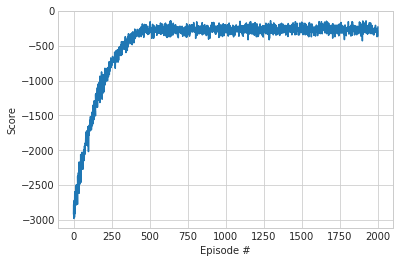

In [9]:
# plot the scores
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [10]:
np.mean(scores[500:])

-265.75969977823894

In [ ]:
0.35*1000 * (1 - rho) - rho * 0.35*1000